In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")

In [2]:
#Load data
fraud = pd.read_csv(r"C:\Users\hp\Pictures\Adey Innovations inc\Fraud-Detection-for-E-commerce-and-Bank-Transactions\data\Fraud_Data.csv")
ip = pd.read_csv(r"C:\Users\hp\Pictures\Adey Innovations inc\Fraud-Detection-for-E-commerce-and-Bank-Transactions\data\IpAddress_to_Country.csv")
print(fraud.head())

   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  


In [3]:
#Basic checks
fraud.info()
fraud.isna().sum()
fraud.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


np.int64(0)

c:\Users\hp\Music\Adey Innovations inc\Fraud-Detection-for-E-commerce-and-Bank-Transactions\.week5\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


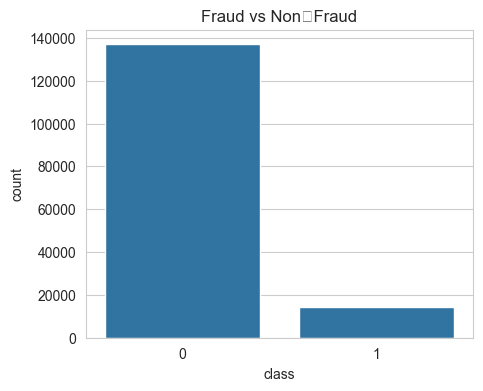

In [4]:
#Target distribution
plt.figure(figsize=(5,4))
sns.countplot(x='class', data=fraud)
plt.title("Fraud vs Non‑Fraud")
plt.show()

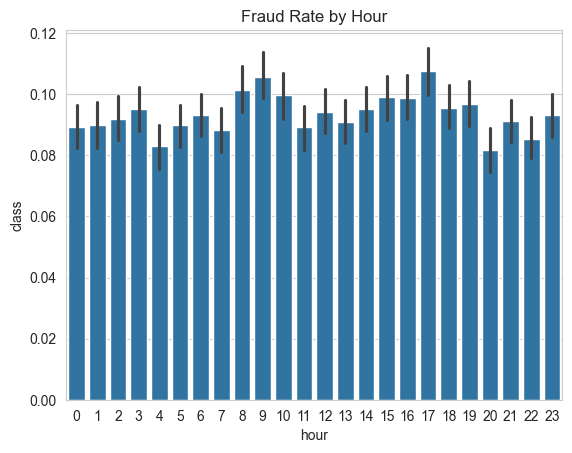

In [5]:
#Time features (EDA only)
fraud['signup_time'] = pd.to_datetime(fraud['signup_time'])
fraud['purchase_time'] = pd.to_datetime(fraud['purchase_time'])


fraud['hour'] = fraud['purchase_time'].dt.hour
fraud['weekday'] = fraud['purchase_time'].dt.dayofweek

sns.barplot(x='hour', y='class', data=fraud)
plt.title("Fraud Rate by Hour")
plt.show()

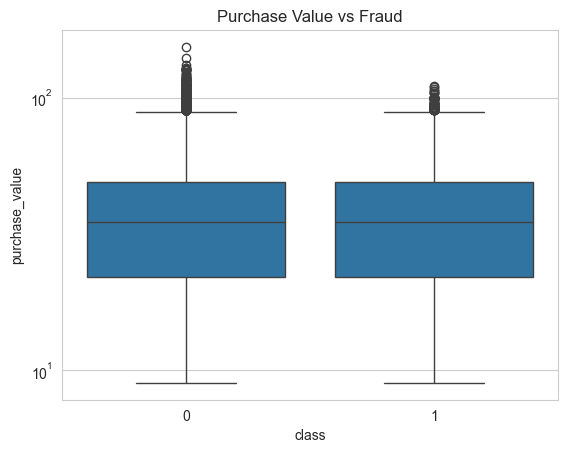

In [6]:
#Purchase value vs fraud
sns.boxplot(x='class', y='purchase_value', data=fraud)
plt.yscale('log')
plt.title("Purchase Value vs Fraud")
plt.show()

In [ ]:
#IP → Country (EDA)
import matplotlib.pyplot as plt

# Convert IPs to integers
fraud['ip_int'] = fraud['ip_address'].astype(int)
ip['lower_bound_ip_address'] = ip['lower_bound_ip_address'].astype(int)
ip['upper_bound_ip_address'] = ip['upper_bound_ip_address'].astype(int)

# IP → Country lookup function
def lookup_country(ip_val):
    row = ip[
        (ip['lower_bound_ip_address'] <= ip_val) &
        (ip['upper_bound_ip_address'] >= ip_val)
    ]
    return row['country'].values[0] if not row.empty else 'Unknown'

# Apply mapping
fraud['country'] = fraud['ip_int'].apply(lookup_country)

# Fraud rate by country
(
    fraud.groupby('country')['class']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .plot(kind='bar', figsize=(8, 4))
)

plt.title("Top Countries by Fraud Rate")
plt.ylabel("Fraud Rate")
plt.xlabel("Country")
plt.tight_layout()
plt.show()
